In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [212]:
df_orig = pd.read_csv("data/characteristic_2.csv")

In [213]:
# Calculate daily sales
df_orig["Daily Sales"] = df_orig["Total Sales"].diff().fillna(0)
df_orig

,Total Sales,Date,Daily Sales
0,0,9/9/2024,0.0
1,27,9/11/2024,27.0
2,200,9/12/2024,173.0
3,5715,9/17/2024,5515.0
4,11840,9/24/2024,6125.0
...,...,...,...
131,25558,2/9/2025,-18.0
132,25484,2/10/2025,-74.0
133,25281,2/11/2025,-203.0
134,25281,2/12/2025,0.0


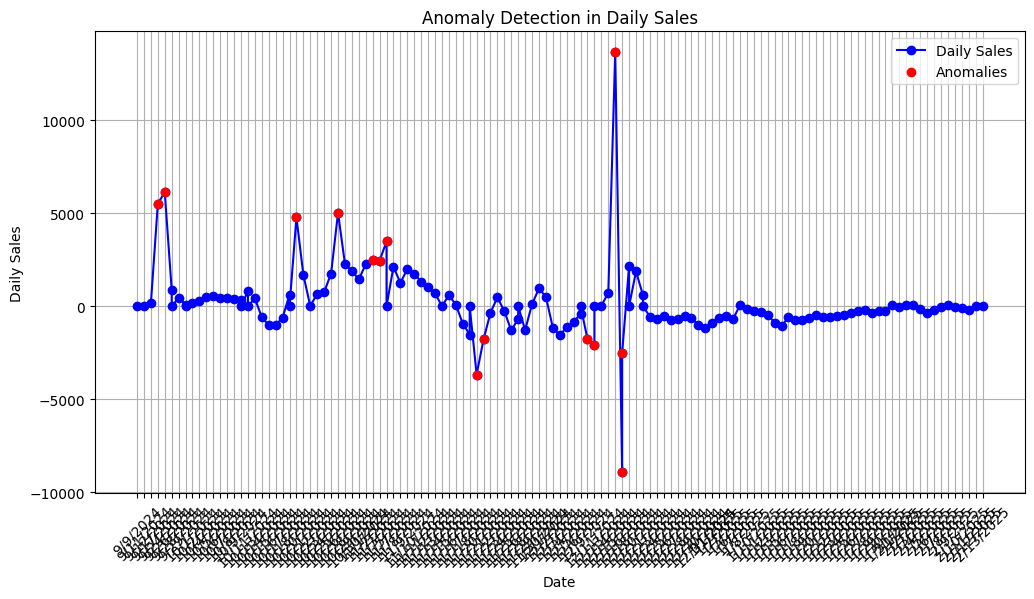

,Total Sales,Date,Daily Sales,Anomaly
3,5715,9/17/2024,5515.0,-1
4,11840,9/24/2024,6125.0,-1
28,19686,10/20/2024,4771.0,-1
34,29577,10/26/2024,5021.0,-1
39,39933,11/2/2024,2496.0,-1
40,42374,11/3/2024,2441.0,-1
41,45860,11/5/2024,3486.0,-1
56,50536,11/20/2024,-3674.0,-1
57,48747,11/21/2024,-1789.0,-1
74,40027,12/9/2024,-1761.0,-1


In [214]:
# Use Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination="auto", random_state=42)
df_orig['Anomaly'] = iso_forest.fit_predict(df_orig[['Daily Sales']])

# Identify anomalies (-1 means anomaly, 1 means normal)
anomalies = df_orig[df_orig['Anomaly'] == -1]

# Plot original Daily Sales with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_orig['Date'], df_orig['Daily Sales'], marker='o', linestyle='-', label='Daily Sales', color='b')
plt.scatter(anomalies['Date'], anomalies['Daily Sales'], color='r', label='Anomalies', zorder=3)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.title('Anomaly Detection in Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

# Display detected anomalies
anomalies

In [215]:
# Interpolate values for anomalies
anomaly_indices = df_orig[df_orig["Anomaly"] == -1].index

if not anomaly_indices.empty:
    # Replace anomaly sales values with NaN
    df_orig.loc[anomaly_indices, "Daily Sales"] = pd.NA
    
    # Use linear interpolation
    df_orig["Daily Sales"] = df_orig["Daily Sales"].interpolate()
    
    #If first row is anomaly, use backward fill only for the first row if needed.
    if pd.isna(df_orig.loc[0, "Daily Sales"]) and 0 in anomaly_indices:
        df_orig["Daily Sales"] = df_orig["Daily Sales"].bfill()

In [216]:
anomalies = df_orig[df_orig['Anomaly'] == -1]
anomalies

,Total Sales,Date,Daily Sales,Anomaly
3,5715,9/17/2024,404.666667,-1
4,11840,9/24/2024,636.333333,-1
28,19686,10/20/2024,839.000000,-1
34,29577,10/26/2024,2013.000000,-1
39,39933,11/2/2024,1689.750000,-1
40,42374,11/3/2024,1126.500000,-1
41,45860,11/5/2024,563.250000,-1
56,50536,11/20/2024,-117.666667,-1
57,48747,11/21/2024,-235.333333,-1
74,40027,12/9/2024,0.000000,-1


In [217]:
df_orig

,Total Sales,Date,Daily Sales,Anomaly
0,0,9/9/2024,0.000000,1
1,27,9/11/2024,27.000000,1
2,200,9/12/2024,173.000000,1
3,5715,9/17/2024,404.666667,-1
4,11840,9/24/2024,636.333333,-1
...,...,...,...,...
131,25558,2/9/2025,-18.000000,1
132,25484,2/10/2025,-74.000000,1
133,25281,2/11/2025,-203.000000,1
134,25281,2/12/2025,0.000000,1


In [218]:
# Interpolate values for daily sales that are negative
negative_diff_indices = df_orig[df_orig["Daily Sales"] < 0].index

if not negative_diff_indices.empty:
    # Replace negative difference sales values with NaN.
    df_orig.loc[negative_diff_indices, "Daily Sales"] = pd.NA

    # Use linear interpolation
    df_orig["Daily Sales"] = df_orig["Daily Sales"].interpolate()

    # Handle the first row edge case
    if pd.isna(df_orig.loc[0, "Daily Sales"]) and 1 in negative_diff_indices:
        df_orig["Daily Sales"] = df_orig["Daily Sales"].bfill()

In [219]:
df_orig

,Total Sales,Date,Daily Sales,Anomaly
0,0,9/9/2024,0.000000,1
1,27,9/11/2024,27.000000,1
2,200,9/12/2024,173.000000,1
3,5715,9/17/2024,404.666667,-1
4,11840,9/24/2024,636.333333,-1
...,...,...,...,...
131,25558,2/9/2025,66.750000,1
132,25484,2/10/2025,44.500000,1
133,25281,2/11/2025,22.250000,1
134,25281,2/12/2025,0.000000,1


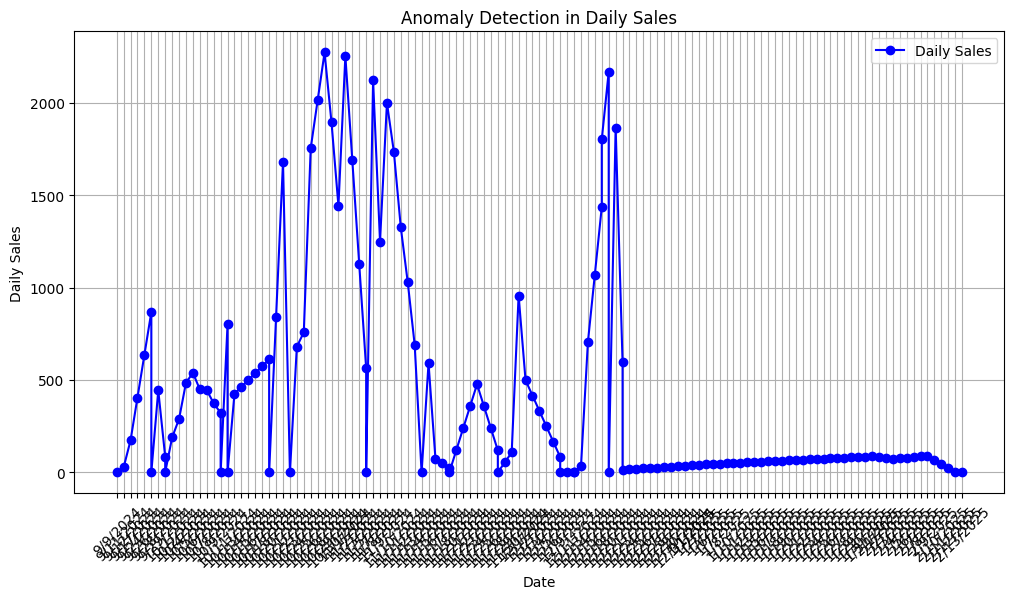

In [220]:
# Plot original Total Sales with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_orig['Date'], df_orig['Daily Sales'], marker='o', linestyle='-', label='Daily Sales', color='b')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.title('Anomaly Detection in Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

In [221]:
# Drop the Anomaly column
df_orig.drop(columns=["Anomaly"], inplace=True)

# Make Daily Sales integer
df_orig["Daily Sales"] = df_orig["Daily Sales"].astype(int)

df_orig

,Total Sales,Date,Daily Sales
0,0,9/9/2024,0
1,27,9/11/2024,27
2,200,9/12/2024,173
3,5715,9/17/2024,404
4,11840,9/24/2024,636
...,...,...,...
131,25558,2/9/2025,66
132,25484,2/10/2025,44
133,25281,2/11/2025,22
134,25281,2/12/2025,0
